**Second model - Added in dummy variables and Interaction Terms**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
#allows me to scroll left to right (Credit to Andy)
pd.options.display.max_columns = 999

**Step 1) Reading Data Dict and read in data.**

In [3]:
df = pd.read_csv('../datasets/train.csv')
df_test = pd.read_csv('../datasets/test.csv')

#Allows me to put columns in alphabetical order (Credit to Andy)
df = df.reindex(sorted(df.columns), axis=1)
df_test = df_test.reindex(sorted(df_test.columns), axis=1)
df.head()

,1st Flr SF,2nd Flr SF,3Ssn Porch,Alley,Bedroom AbvGr,Bldg Type,Bsmt Cond,Bsmt Exposure,Bsmt Full Bath,Bsmt Half Bath,Bsmt Qual,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,BsmtFin Type 1,BsmtFin Type 2,Central Air,Condition 1,Condition 2,Electrical,Enclosed Porch,Exter Cond,Exter Qual,Exterior 1st,Exterior 2nd,Fence,Fireplace Qu,Fireplaces,Foundation,Full Bath,Functional,Garage Area,Garage Cars,Garage Cond,Garage Finish,Garage Qual,Garage Type,Garage Yr Blt,Gr Liv Area,Half Bath,Heating,Heating QC,House Style,Id,Kitchen AbvGr,Kitchen Qual,Land Contour,Land Slope,Lot Area,Lot Config,Lot Frontage,Lot Shape,Low Qual Fin SF,MS SubClass,MS Zoning,Mas Vnr Area,Mas Vnr Type,Misc Feature,Misc Val,Mo Sold,Neighborhood,Open Porch SF,Overall Cond,Overall Qual,PID,Paved Drive,Pool Area,Pool QC,Roof Matl,Roof Style,Sale Type,SalePrice,Screen Porch,Street,TotRms AbvGrd,Total Bsmt SF,Utilities,Wood Deck SF,Year Built,Year Remod/Add,Yr Sold
0,725,754,0,NaN,3,1Fam,TA,No,0.0,0.0,TA,192.0,533.0,0.0,GLQ,Unf,Y,RRAe,Norm,SBrkr,0,TA,Gd,HdBoard,Plywood,NaN,NaN,0,CBlock,2,Typ,475.0,2.0,TA,RFn,TA,Attchd,1976.0,1479,1,GasA,Ex,2Story,109,1,Gd,Lvl,Gtl,13517,CulDSac,NaN,IR1,0,60,RL,289.0,BrkFace,NaN,0,3,Sawyer,44,8,6,533352170,Y,0,NaN,CompShg,Gable,WD,130500,0,Pave,6,725.0,AllPub,0,1976,2005,2010
1,913,1209,0,NaN,4,1Fam,TA,No,1.0,0.0,Gd,276.0,637.0,0.0,GLQ,Unf,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,559.0,2.0,TA,RFn,TA,Attchd,1997.0,2122,1,GasA,Ex,2Story,544,1,Gd,Lvl,Gtl,11492,CulDSac,43.0,IR1,0,60,RL,132.0,BrkFace,NaN,0,4,SawyerW,74,5,7,531379050,Y,0,NaN,CompShg,Gable,WD,220000,0,Pave,8,913.0,AllPub,0,1996,1997,2009
2,1057,0,0,NaN,3,1Fam,TA,No,1.0,0.0,TA,326.0,731.0,0.0,GLQ,Unf,Y,Norm,Norm,SBrkr,0,Gd,TA,VinylSd,VinylSd,NaN,NaN,0,CBlock,1,Typ,246.0,1.0,TA,Unf,TA,Detchd,1953.0,1057,0,GasA,TA,1Story,153,1,Gd,Lvl,Gtl,7922,Inside,68.0,Reg,0,20,RL,0.0,None,NaN,0,1,NAmes,52,7,5,535304180,Y,0,NaN,CompShg,Gable,WD,109000,0,Pave,5,1057.0,AllPub,0,1953,2007,2010
3,744,700,0,NaN,3,1Fam,TA,No,0.0,0.0,Gd,384.0,0.0,0.0,Unf,Unf,Y,Norm,Norm,SBrkr,0,TA,TA,VinylSd,VinylSd,NaN,NaN,0,PConc,2,Typ,400.0,2.0,TA,Fin,TA,BuiltIn,2007.0,1444,1,GasA,Gd,2Story,318,1,TA,Lvl,Gtl,9802,Inside,73.0,Reg,0,60,RL,0.0,None,NaN,0,4,Timber,0,5,5,916386060,Y,0,NaN,CompShg,Gable,WD,174000,0,Pave,7,384.0,AllPub,100,2006,2007,2010
4,831,614,0,NaN,3,1Fam,Gd,No,0.0,0.0,Fa,676.0,0.0,0.0,Unf,Unf,Y,Norm,Norm,SBrkr,0,TA,TA,Wd Sdng,Plywood,NaN,NaN,0,PConc,2,Typ,484.0,2.0,TA,Unf,TA,Detchd,1957.0,1445,0,GasA,TA,1.5Fin,255,1,TA,Lvl,Gtl,14235,Inside,82.0,IR1,0,50,RL,0.0,None,NaN,0,3,SawyerW,59,8,6,906425045,N,0,NaN,CompShg,Gable,WD,138500,0,Pave,6,676.0,AllPub,0,1900,1993,2010


**Step 2) Feature selection (only looking at numerical with no null values)**

In [4]:
df.corr()['SalePrice'].sort_values(ascending = False)

SalePrice          1.000000
Overall Qual       0.800207
Gr Liv Area        0.697038
Garage Area        0.650270
Garage Cars        0.648220
Total Bsmt SF      0.628925
1st Flr SF         0.618486
Year Built         0.571849
Year Remod/Add     0.550370
Full Bath          0.537969
Garage Yr Blt      0.533922
Mas Vnr Area       0.512230
TotRms AbvGrd      0.504014
Fireplaces         0.471093
BsmtFin SF 1       0.423519
Lot Frontage       0.341842
Open Porch SF      0.333476
Wood Deck SF       0.326490
Lot Area           0.296566
Bsmt Full Bath     0.283662
Half Bath          0.283001
2nd Flr SF         0.248452
Bsmt Unf SF        0.190210
Bedroom AbvGr      0.137067
Screen Porch       0.134581
3Ssn Porch         0.048732
Mo Sold            0.032735
Pool Area          0.023106
BsmtFin SF 2       0.016255
Misc Val          -0.007375
Yr Sold           -0.015203
Low Qual Fin SF   -0.041594
Bsmt Half Bath    -0.045328
Id                -0.051398
MS SubClass       -0.087335
Overall Cond      -0

In [5]:
df._get_numeric_data().isnull().sum()

1st Flr SF           0
2nd Flr SF           0
3Ssn Porch           0
Bedroom AbvGr        0
Bsmt Full Bath       2
Bsmt Half Bath       2
Bsmt Unf SF          1
BsmtFin SF 1         1
BsmtFin SF 2         1
Enclosed Porch       0
Fireplaces           0
Full Bath            0
Garage Area          1
Garage Cars          1
Garage Yr Blt      114
Gr Liv Area          0
Half Bath            0
Id                   0
Kitchen AbvGr        0
Lot Area             0
Lot Frontage       330
Low Qual Fin SF      0
MS SubClass          0
Mas Vnr Area        22
Misc Val             0
Mo Sold              0
Open Porch SF        0
Overall Cond         0
Overall Qual         0
PID                  0
Pool Area            0
SalePrice            0
Screen Porch         0
TotRms AbvGrd        0
Total Bsmt SF        1
Wood Deck SF         0
Year Built           0
Year Remod/Add       0
Yr Sold              0
dtype: int64

In [6]:
df.select_dtypes(include=['object']).dtypes

Alley             object
Bldg Type         object
Bsmt Cond         object
Bsmt Exposure     object
Bsmt Qual         object
BsmtFin Type 1    object
BsmtFin Type 2    object
Central Air       object
Condition 1       object
Condition 2       object
Electrical        object
Exter Cond        object
Exter Qual        object
Exterior 1st      object
Exterior 2nd      object
Fence             object
Fireplace Qu      object
Foundation        object
Functional        object
Garage Cond       object
Garage Finish     object
Garage Qual       object
Garage Type       object
Heating           object
Heating QC        object
House Style       object
Kitchen Qual      object
Land Contour      object
Land Slope        object
Lot Config        object
Lot Shape         object
MS Zoning         object
Mas Vnr Type      object
Misc Feature      object
Neighborhood      object
Paved Drive       object
Pool QC           object
Roof Matl         object
Roof Style        object
Sale Type         object


In [7]:
#df['bsmt_cond_num'] = df['bsmt_cond'].map({'Ex': 6, 'Gd':5, 'TA': 4, 'Fa':3, 'Po':2, 'NA':1})
df['Neighborhood'].unique()

array(['Sawyer', 'SawyerW', 'NAmes', 'Timber', 'Edwards', 'OldTown',
       'BrDale', 'CollgCr', 'Somerst', 'Mitchel', 'StoneBr', 'NridgHt',
       'Gilbert', 'Crawfor', 'IDOTRR', 'NWAmes', 'Veenker', 'MeadowV',
       'SWISU', 'NoRidge', 'ClearCr', 'Blmngtn', 'BrkSide', 'NPkVill',
       'Blueste', 'GrnHill', 'Greens', 'Landmrk'], dtype=object)

In [8]:
df.shape

(2051, 81)

**Step 3) Investigate the Features**

Going through and looking for null values on each of the features.

In [9]:
df['Kitchen Qual'].describe()

count     2051
unique       4
top         TA
freq      1047
Name: Kitchen Qual, dtype: object

In [10]:
df['Kitchen Qual'].isnull().sum()

0

In [11]:
#Because this is an object but can be ranked, I will replace the scores of Ex, Gd, TA, Fa, Po with numbers.
 df['Kitchen Qual'].map({'Ex': 5, 'Gd':4, 'TA': 3, 'Fa':2, 'Po':1, 'NA':0})
df['Kitchen Qual Num']

0       4
1       4
2       4
3       3
4       3
       ..
2046    4
2047    3
2048    3
2049    3
2050    4
Name: Kitchen Qual Num, Length: 2051, dtype: int64

In [12]:
df['Overall Qual'].describe()

count    2051.000000
mean        6.112140
std         1.426271
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: Overall Qual, dtype: float64

In [13]:
df['Overall Qual'].isnull().sum()

0

**Step 4) Feature Engineering**

In [14]:
df['Year Remod/Add'].describe()

count    2051.000000
mean     1984.190151
std        21.036250
min      1950.000000
25%      1964.500000
50%      1993.000000
75%      2004.000000
max      2010.000000
Name: Year Remod/Add, dtype: float64

In [15]:
df['Year Remod/Add'].isnull().sum()

0

In [16]:
df['Year Remod/Add'].sort_values()

814     1950
1077    1950
1079    1950
362     1950
1088    1950
        ... 
1671    2010
144     2010
398     2010
172     2010
142     2010
Name: Year Remod/Add, Length: 2051, dtype: int64

In [17]:
#Interaction Terms
df['yr_remod_or_built'] = df['Year Remod/Add'] * df['Year Built']

In [18]:
#df['Neighborhood'] = pd.factorize(df['Neighborhood'])[0]
df = pd.get_dummies(df, columns=['Neighborhood'], drop_first=True)
neigh_dum = [col for col in df.columns if 'Neighborhood' in col]
df.head()

,1st Flr SF,2nd Flr SF,3Ssn Porch,Alley,Bedroom AbvGr,Bldg Type,Bsmt Cond,Bsmt Exposure,Bsmt Full Bath,Bsmt Half Bath,Bsmt Qual,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,BsmtFin Type 1,BsmtFin Type 2,Central Air,Condition 1,Condition 2,Electrical,Enclosed Porch,Exter Cond,Exter Qual,Exterior 1st,Exterior 2nd,Fence,Fireplace Qu,Fireplaces,Foundation,Full Bath,Functional,Garage Area,Garage Cars,Garage Cond,Garage Finish,Garage Qual,Garage Type,Garage Yr Blt,Gr Liv Area,Half Bath,Heating,Heating QC,House Style,Id,Kitchen AbvGr,Kitchen Qual,Land Contour,Land Slope,Lot Area,Lot Config,Lot Frontage,Lot Shape,Low Qual Fin SF,MS SubClass,MS Zoning,Mas Vnr Area,Mas Vnr Type,Misc Feature,Misc Val,Mo Sold,Open Porch SF,Overall Cond,Overall Qual,PID,Paved Drive,Pool Area,Pool QC,Roof Matl,Roof Style,Sale Type,SalePrice,Screen Porch,Street,TotRms AbvGrd,Total Bsmt SF,Utilities,Wood Deck SF,Year Built,Year Remod/Add,Yr Sold,Kitchen Qual Num,yr_remod_or_built,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,725,754,0,NaN,3,1Fam,TA,No,0.0,0.0,TA,192.0,533.0,0.0,GLQ,Unf,Y,RRAe,Norm,SBrkr,0,TA,Gd,HdBoard,Plywood,NaN,NaN,0,CBlock,2,Typ,475.0,2.0,TA,RFn,TA,Attchd,1976.0,1479,1,GasA,Ex,2Story,109,1,Gd,Lvl,Gtl,13517,CulDSac,NaN,IR1,0,60,RL,289.0,BrkFace,NaN,0,3,44,8,6,533352170,Y,0,NaN,CompShg,Gable,WD,130500,0,Pave,6,725.0,AllPub,0,1976,2005,2010,4,3961880,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,913,1209,0,NaN,4,1Fam,TA,No,1.0,0.0,Gd,276.0,637.0,0.0,GLQ,Unf,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,559.0,2.0,TA,RFn,TA,Attchd,1997.0,2122,1,GasA,Ex,2Story,544,1,Gd,Lvl,Gtl,11492,CulDSac,43.0,IR1,0,60,RL,132.0,BrkFace,NaN,0,4,74,5,7,531379050,Y,0,NaN,CompShg,Gable,WD,220000,0,Pave,8,913.0,AllPub,0,1996,1997,2009,4,3986012,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1057,0,0,NaN,3,1Fam,TA,No,1.0,0.0,TA,326.0,731.0,0.0,GLQ,Unf,Y,Norm,Norm,SBrkr,0,Gd,TA,VinylSd,VinylSd,NaN,NaN,0,CBlock,1,Typ,246.0,1.0,TA,Unf,TA,Detchd,1953.0,1057,0,GasA,TA,1Story,153,1,Gd,Lvl,Gtl,7922,Inside,68.0,Reg,0,20,RL,0.0,None,NaN,0,1,52,7,5,535304180,Y,0,NaN,CompShg,Gable,WD,109000,0,Pave,5,1057.0,AllPub,0,1953,2007,2010,4,3919671,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,744,700,0,NaN,3,1Fam,TA,No,0.0,0.0,Gd,384.0,0.0,0.0,Unf,Unf,Y,Norm,Norm,SBrkr,0,TA,TA,VinylSd,VinylSd,NaN,NaN,0,PConc,2,Typ,400.0,2.0,TA,Fin,TA,BuiltIn,2007.0,1444,1,GasA,Gd,2Story,318,1,TA,Lvl,Gtl,9802,Inside,73.0,Reg,0,60,RL,0.0,None,NaN,0,4,0,5,5,916386060,Y,0,NaN,CompShg,Gable,WD,174000,0,Pave,7,384.0,AllPub,100,2006,2007,2010,3,4026042,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,831,614,0,NaN,3,1Fam,Gd,No,0.0,0.0,Fa,676.0,0.0,0.0,Unf,Unf,Y,Norm,Norm,SBrkr,0,TA,TA,Wd Sdng,Plywood,NaN,NaN,0,PConc,2,Typ,484.0,2.0,TA,Unf,TA,Detchd,1957.0,1445,0,GasA,TA,1.5Fin,255,1,TA,Lvl,Gtl,14235,Inside,82.0,IR1,0,50,RL,0.0,None,NaN,0,3,59,8,6,906425045,N,0,NaN,CompShg,Gable,WD,138500,0,Pave,6,676.0,AllPub,0,1900,1993,2010,3,3786700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


**Do all of the cleaning/engineering to the test file**

In [19]:
df_test['Kitchen Qual Num'] = df_test['Kitchen Qual'].map({'Ex': 5, 'Gd':4, 'TA': 3, 'Fa':2, 'Po':1, 'NA':0})
df_test['yr_remod_or_built'] = df_test['Year Remod/Add'] * df_test['Year Built']
df_test = pd.get_dummies(df_test, columns=['Neighborhood'], drop_first=True)
#df_test['Neighborhood'] = pd.factorize(df_test['Neighborhood'])[0]

**Step 5) Set Features and the Y**

In [20]:
features = ['Kitchen Qual Num', 'yr_remod_or_built', 'Overall Qual']
features.extend(neigh_dum)
features

['Kitchen Qual Num',
 'yr_remod_or_built',
 'Overall Qual',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_Greens',
 'Neighborhood_GrnHill',
 'Neighborhood_IDOTRR',
 'Neighborhood_Landmrk',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'Neighborhood_SawyerW',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Timber',
 'Neighborhood_Veenker']

How to combine two lists ([*source*](https://www.kite.com/python/answers/how-to-append-one-list-to-another-list-in-python))

In [21]:
X = df[features]
y = df['SalePrice']

In [22]:
# Instantiate the model

lr = LinearRegression()

Step 6) Cross-val Score

In [23]:
cross_val_score(lr, X, y).mean()

0.7434945340550307

**Step 7) Train, Test, Split**

Be careful with what you label the test.

In [24]:
X_train, X_validate, y_train, y_validate = train_test_split(X, y, random_state = 33)

**Step 8) Fit model**

In [25]:
lr.fit(X_train, y_train)

LinearRegression()

In [26]:
#Train Score

lr.score(X_train, y_train)

0.7695214976557637

In [27]:
#Test score

lr.score(X_validate, y_validate)

0.6918917412927974

In [28]:
cross_val_score(lr, X_train, y_train).mean()

0.7563740160750367

Low Variance. Pretty good on bias. Want to check by plotting residual plot

**Step 9) Residuals Plot Check**

In [29]:
pred = lr.predict(X)

In [30]:
residuals = y - pred

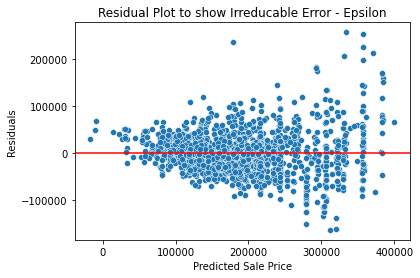

In [31]:
plt.axhline(y = 0, color='r')
sns.scatterplot(x = pred, y = residuals)
plt.title('Residual Plot to show Irreducable Error - Epsilon')
plt.xlabel('Predicted Sale Price')
plt.ylabel('Residuals');

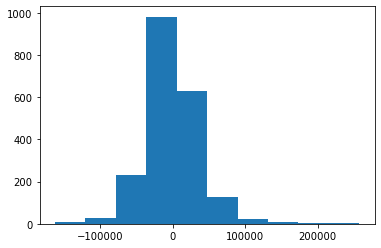

In [32]:
plt.hist(residuals);

In [33]:
residuals.sort_values()

125    -162504.108268
960    -160507.097958
156    -149098.349916
1885   -136791.423424
339    -132405.595651
            ...      
1692    212995.073763
1796    225673.936328
1897    236651.450912
1671    254129.151604
1964    257093.850814
Name: SalePrice, Length: 2051, dtype: float64

In [34]:
residuals.mean()

-803.5679287082071

**Set up Submission file for Kaggle.**

In [35]:
#Got an error that two columns were missing. Below I determined whiche two columns and then added those to df_test with 0 values. 

neigh_dum_test = [col for col in df_test.columns if 'Neighborhood' in col]
diff_neigh = list(set(neigh_dum) - set(neigh_dum_test))
df_test[diff_neigh[0]] = 0
df_test[diff_neigh[1]] = 0
df_test.head()

,1st Flr SF,2nd Flr SF,3Ssn Porch,Alley,Bedroom AbvGr,Bldg Type,Bsmt Cond,Bsmt Exposure,Bsmt Full Bath,Bsmt Half Bath,Bsmt Qual,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,BsmtFin Type 1,BsmtFin Type 2,Central Air,Condition 1,Condition 2,Electrical,Enclosed Porch,Exter Cond,Exter Qual,Exterior 1st,Exterior 2nd,Fence,Fireplace Qu,Fireplaces,Foundation,Full Bath,Functional,Garage Area,Garage Cars,Garage Cond,Garage Finish,Garage Qual,Garage Type,Garage Yr Blt,Gr Liv Area,Half Bath,Heating,Heating QC,House Style,Id,Kitchen AbvGr,Kitchen Qual,Land Contour,Land Slope,Lot Area,Lot Config,Lot Frontage,Lot Shape,Low Qual Fin SF,MS SubClass,MS Zoning,Mas Vnr Area,Mas Vnr Type,Misc Feature,Misc Val,Mo Sold,Open Porch SF,Overall Cond,Overall Qual,PID,Paved Drive,Pool Area,Pool QC,Roof Matl,Roof Style,Sale Type,Screen Porch,Street,TotRms AbvGrd,Total Bsmt SF,Utilities,Wood Deck SF,Year Built,Year Remod/Add,Yr Sold,Kitchen Qual Num,yr_remod_or_built,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Neighborhood_Landmrk,Neighborhood_GrnHill
0,908,1020,0,Grvl,4,2fmCon,TA,No,0,0,Fa,1020,0,0,Unf,Unf,N,Norm,Norm,FuseP,112,Fa,TA,AsbShng,AsbShng,NaN,NaN,0,Stone,2,Typ,440,1,Po,Unf,Po,Detchd,1910.0,1928,0,GasA,Gd,2Story,2658,2,Fa,Lvl,Gtl,9142,Inside,69.0,Reg,0,190,RM,0.0,None,NaN,0,4,60,8,6,902301120,Y,0,NaN,CompShg,Gable,WD,0,Pave,9,1020,AllPub,0,1910,1950,2006,2,3724500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,1967,0,0,NaN,6,Duplex,TA,No,0,0,Gd,1967,0,0,Unf,Unf,Y,Norm,Norm,SBrkr,0,TA,TA,Plywood,Plywood,NaN,NaN,0,CBlock,2,Typ,580,2,TA,Fin,TA,Attchd,1977.0,1967,0,GasA,TA,1Story,2718,2,TA,Lvl,Gtl,9662,Inside,NaN,IR1,0,90,RL,0.0,None,NaN,0,8,0,4,5,905108090,Y,0,NaN,CompShg,Gable,WD,0,Pave,10,1967,AllPub,170,1977,1977,2006,3,3908529,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,664,832,0,NaN,3,1Fam,Gd,Av,1,0,Gd,100,554,0,GLQ,Unf,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,Gd,1,PConc,2,Typ,426,2,TA,RFn,TA,Attchd,2006.0,1496,1,GasA,Ex,2Story,2414,1,Gd,Lvl,Gtl,17104,Inside,58.0,IR1,0,60,RL,0.0,None,NaN,0,9,24,5,7,528218130,Y,0,NaN,CompShg,Gable,New,0,Pave,7,654,AllPub,100,2006,2006,2006,4,4024036,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,968,0,0,NaN,2,1Fam,TA,No,0,0,TA,968,0,0,Unf,Unf,Y,Norm,Norm,SBrkr,184,TA,Gd,Wd Sdng,Wd Sdng,NaN,NaN,0,CBlock,1,Typ,480,2,TA,Unf,Fa,Detchd,1935.0,968,0,GasA,TA,1Story,1989,1,TA,Lvl,Gtl,8520,Inside,60.0,Reg,0,30,RM,0.0,None,NaN,0,7,0,6,5,902207150,N,0,NaN,CompShg,Gable,WD,0,Pave,5,968,AllPub,0,1923,2006,2007,3,3857538,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,1394,0,0,NaN,3,1Fam,TA,No,1,0,Gd,785,609,0,BLQ,Unf,Y,Norm,Norm,SBrkr,0,TA,TA,Plywood,Plywood,NaN,Gd,2,CBlock,1,Typ,514,2,TA,RFn,TA,Attchd,1963.0,1394,1,GasA,Gd,1Story,625,1,TA,Lvl,Gtl,9500,Inside,NaN,IR1,0,20,RL,247.0,BrkFace,NaN,0,7,76,5,6,535105100,Y,0,NaN,CompShg,Gable,WD,185,Pave,6,1394,AllPub,0,1963,1963,2009,3,3853369,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [36]:
pred_test = lr.predict(df_test[features])

In [37]:
pred_test.shape

(878,)

Create a Sale Price column inside of df_test

In [38]:
df_test['SalePrice'] = pred_test

In [39]:
model2_submission = df_test[['Id', 'SalePrice']]
model2_submission.head()

,Id,SalePrice
0,2658,112296.889137
1,2718,133787.829449
2,2414,217571.162374
3,1989,118157.053781
4,625,159626.829191


In [40]:
model2_submission.set_index('Id', inplace=True) 


In [41]:
model2_submission

,SalePrice
Id,
2658,112296.889137
2718,133787.829449
2414,217571.162374
1989,118157.053781
625,159626.829191
...,...
1662,170551.322086
1234,188328.366253
1373,131412.717051


In [42]:
model2_submission.to_csv('../datasets/Model_submissions/model2_submission.csv') 